# Data Visualization
### Kanja Saha

## Steps
1. <a href='#import_lib'>Import Libraries</a>
1. <a href='#import_data'>Import Data</a>
2. <a href='#preprocess'>Preprocess Data</a>
3. <a href='#explore'>Explore Data</a>
3. <a href='#implement'>Implement Algorithms</a>

## Import Libraries
<a id='import_lib'></a>
In general, import all libraries before importing data. However, for learning purpose, import libraries in each step as needed. This is will give a better understanding of the libraries and their functions.

In [1]:
#import pandas as pd
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib as mpl
#import numpy as np
#import seaborn as sns
#%matplotlib inline

## Import Data
<a id='import_data'></a>
In general, import all needed libraries before importing data. If this is a learning execise, import libraries in each step as needed. This is will give a better understanding of the libraries. 

In [2]:
#import necessary libraries
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
raw_data = pd.read_excel("Online_Retail.xlsx")
print ("Dataset has {} rows(samples) with {} columns(features) each.".format(*raw_data.shape))

# display the top 5 rows of the dataset
raw_data.head(5)

Dataset has 541909 rows(samples) with 8 columns(features) each.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
from sklearn import preprocessing

print('Is there null value in the data frame? {}.' .format('Yes' if (raw_data.isnull().values.any()) else 'No' ))
if (raw_data.isnull().values.any()):
    print(raw_data.isnull().sum())
    
raw_data=raw_data.dropna(subset=['CustomerID'])

raw_data[raw_data['CustomerID'].isnull()].head()


Is there null value in the data frame? Yes.
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [4]:
#summary of dataset's distribution
import numpy as np
raw_data['CustomerID'] = raw_data['CustomerID'].astype(np.int64)
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#items with negative quantity implies returned items, and 0 implies no purchase
raw_data[raw_data.Quantity<=0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [6]:
from datetime import datetime
#calculate recency for each transaction
currentDT = pd.to_datetime(datetime.now().date())
raw_data['Recency']= (pd.to_datetime(datetime.now().date())-pd.to_datetime(raw_data.InvoiceDate)).dt.days

# store the returned items in a dataset
returned_invoices=raw_data[raw_data.Quantity<0]
returned_invoices['Quantity']=returned_invoices['Quantity']*-1

# remove transactions that has negative or 0 quantity or with unit price
raw_data=raw_data[(raw_data.Quantity>0) & (raw_data.UnitPrice>0)]

# get the list of items that are purchased and then returned
keys = ['CustomerID', 'StockCode','Quantity']
i1 = raw_data.set_index(keys).index
i2 = returned_invoices.set_index(keys).index
raw_data_filtered=raw_data[~i1.isin(i2)]


C:\Users\ksaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
import numpy as np

#Calculate revenue(monetization) generated by each customer
def total_price(raw_data_filtered):
    x = (raw_data_filtered.Quantity * raw_data_filtered.UnitPrice)
    return np.sum(x)

data=pd.DataFrame()
data['monetization']=raw_data_filtered.groupby('CustomerID').apply(total_price)
#get the recency of the account
data['recency']=raw_data.groupby('CustomerID').agg({'Recency': np.min})
#get the total number of transactions
data['frequency']=raw_data.groupby('CustomerID').Recency.nunique()

#save customer_id which is an index in the data frame 
CustomerID=data.index
# show summary of the data distribution
data.describe()

,monetization,recency,frequency
count,4324.000000,4324.000000,4324.000000
mean,1924.122274,2508.968085,3.873265
std,8228.468418,100.039894,5.956480
min,2.900000,2417.000000,1.000000
25%,305.475000,2434.000000,1.000000
50%,663.630000,2467.000000,2.000000
75%,1624.420000,2558.000000,4.000000
max,278528.420000,2790.000000,132.000000


In [8]:
import preprocess_data as o
#data,message=o.remove_outliers(data,False)
#print (message)

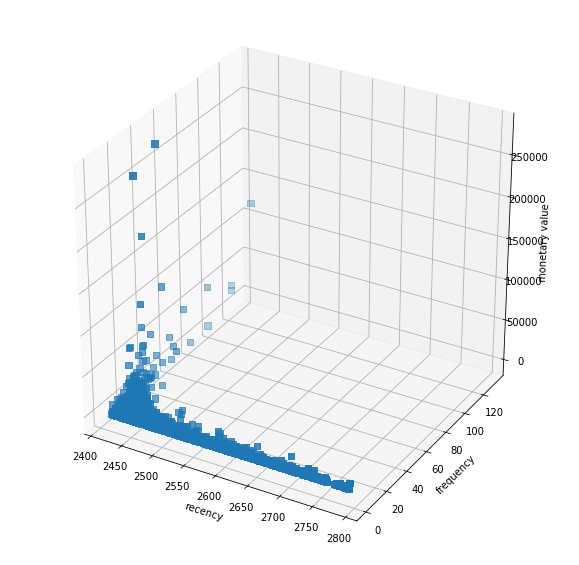

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

ax.scatter(x,y,z, marker="s",  s=40)

plt.show()


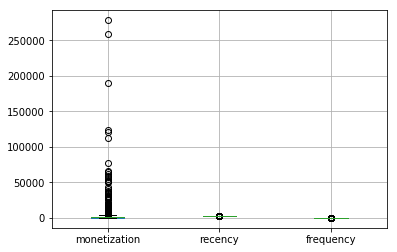

In [10]:
import matplotlib.pyplot as plt
data.boxplot()

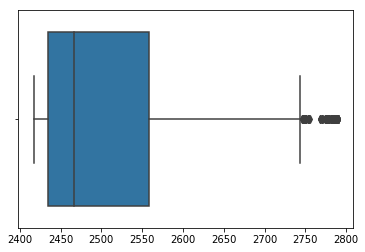

In [11]:
import seaborn as sns
sns.boxplot(x)


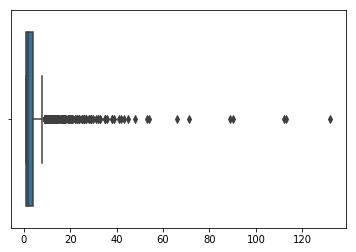

In [12]:
sns.boxplot(y)


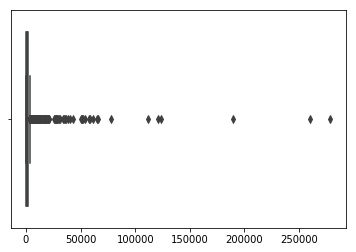

In [13]:
sns.boxplot(z)


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
data.head()

,monetization,recency,frequency
CustomerID,,,
12347,4310.00,2419,7
12348,1797.24,2492,4
12349,1757.55,2435,1
12350,334.40,2727,1
12352,1405.28,2453,7


In [15]:
import preprocess_data as o
data,message=o.remove_outliers(data,True)
print (message)

273 (6.31%) data points considered outliers from the dataset of 4324. Outlier Dropped from dataset.


C:\Users\ksaha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ksaha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ksaha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


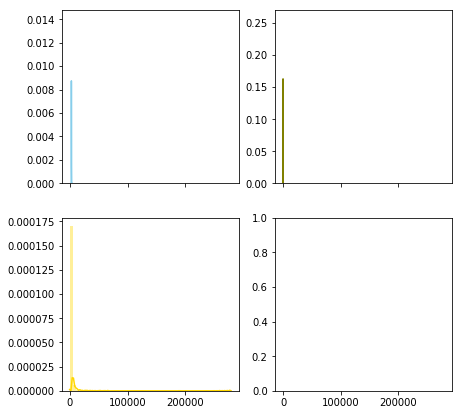

In [16]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( x , color="skyblue", ax=axes[0, 0])
sns.distplot( y , color="olive", ax=axes[0, 1])
sns.distplot(z , color="gold", ax=axes[1, 0])



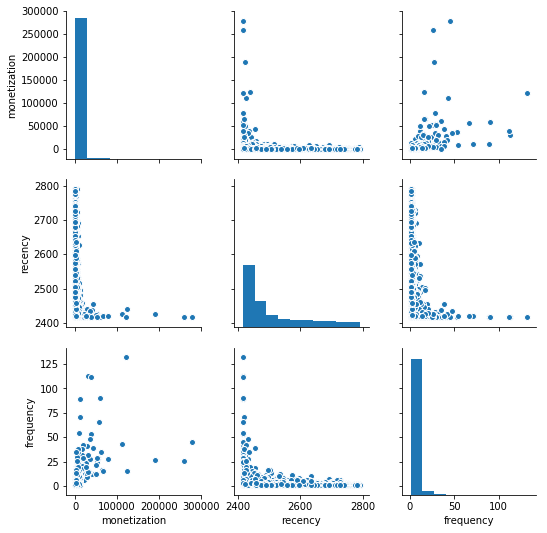

In [17]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF0C0522E8>,
      dtype=object)

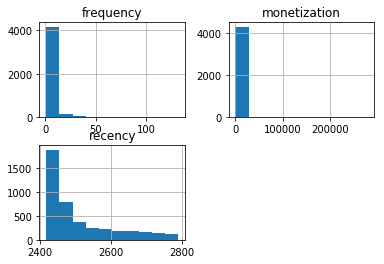

In [18]:
data.hist()

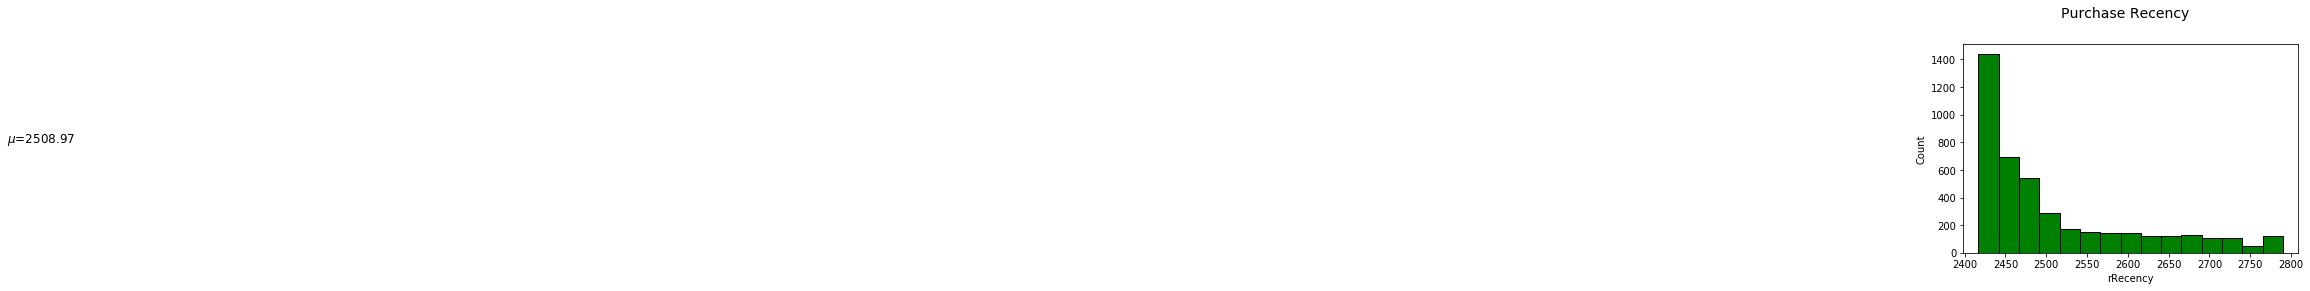

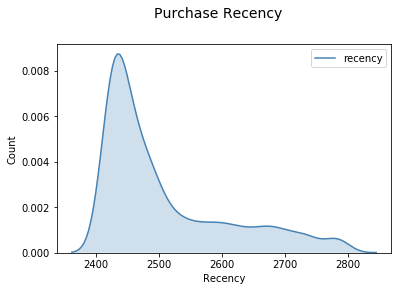

In [19]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Purchase Recency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("rRecency")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['recency'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['recency'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Purchase Recency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Recency")
ax1.set_ylabel("Count") 
sns.kdeplot(data['recency'], ax=ax1, shade=True, color='steelblue')
                                    


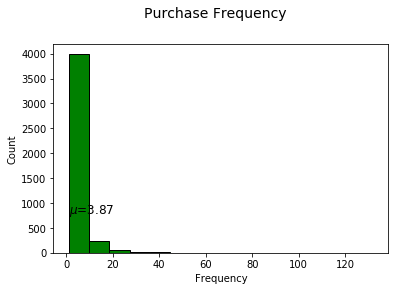

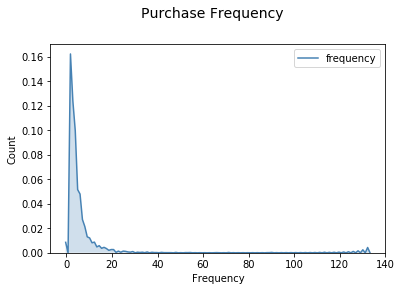

In [26]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Purchase Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['frequency'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['frequency'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Purchase Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Count") 
sns.kdeplot(data['frequency'], ax=ax1, shade=True, color='steelblue')
                                    

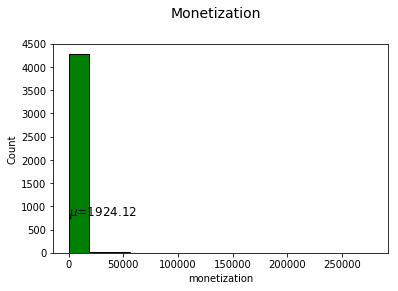

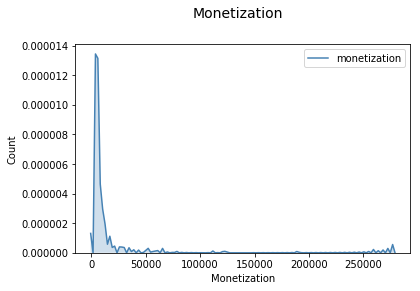

In [27]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Monetization", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("monetization")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['monetization'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['monetization'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Monetization", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Monetization")
ax1.set_ylabel("Count") 
sns.kdeplot(data['monetization'], ax=ax1, shade=True, color='steelblue')

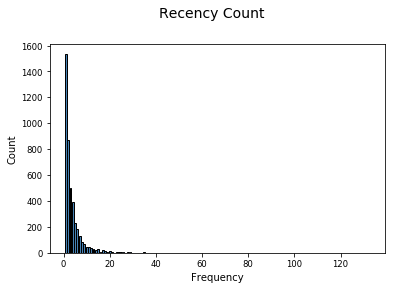

In [24]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Recency Count", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count") 
w_q = data['frequency'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

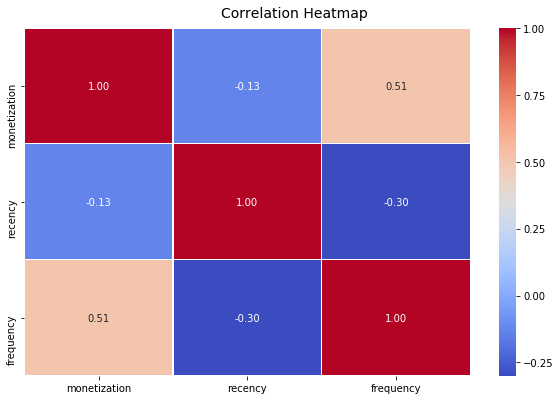

In [21]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

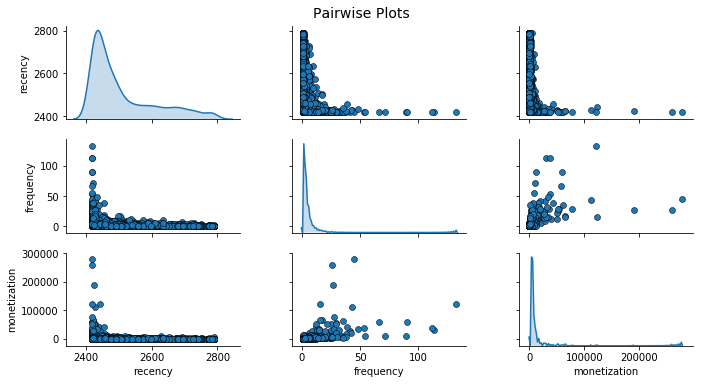

In [22]:
# Pair-wise Scatter Plots
cols = ['recency', 'frequency', 'monetization']
pp = sns.pairplot(data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)

In [23]:
# Scaling attribute values to avoid few outiers
cols = ['recency', 'frequency', 'monetization']
subset_df = data[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

NameError: name 'wines' is not defined